# Import data

In [1]:
#import libraries
import datetime #manipulate DateTime 
import pandas as pd # structure the datasets
import numpy as np #manipulate the dataset
import seaborn as sns #visualize the data 
from matplotlib import pyplot as plt  #visualize the data 
%matplotlib inline 


In [2]:
# making data frame from the csv file 
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv',
            usecols=[0,1,2,3,6,9,10,11,12,14,16,17,18,19,20,21,22])

# printing the first 5 rows of  the data
df.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,pop,dance pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,pop,dance pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,pop,dance pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,pop,dance pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,pop,dance pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
#number of rows and columns
df.shape

(32833, 17)

# Clean data

In [4]:
#changing column names
df.columns = ['id','album_name','artist','popularity','release_date','genre',
              'subgenre','danceability','energy','loudness',
              'speechiness','acousticness','instrumentalness','liveness','valence','tempo','album_duration' ]

In [5]:
# inspect data dtype
df.dtypes

id                   object
album_name           object
artist               object
popularity            int64
release_date         object
genre                object
subgenre             object
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
album_duration        int64
dtype: object

In [6]:
#convert columns to nominal data type. 
df['release_date'] =  pd.to_datetime(df['release_date'])

df['genre' ]= df['genre'].astype('category')
df['subgenre' ]= df['subgenre'].astype('category')
df['album_name' ]= df['album_name'].astype('category')

In [7]:
#missing/null Values
df.isnull().sum()

id                  0
album_name          5
artist              5
popularity          0
release_date        0
genre               0
subgenre            0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
album_duration      0
dtype: int64

In [8]:
# dropping all those rows which  have any missing value in it. 
df.dropna(inplace = True) 

#findding whether the dataset contain duplicate rows
df.duplicated().sum()

0

# Manipulate data 

In [9]:

# calculating the year from the startime
df['year'] = pd.to_datetime(df["release_date"]).dt.strftime('%Y')


# transforming the durantion of the trip from seconds to hr:m:s
df['album_duration']=pd.to_datetime(df.album_duration, unit='ms').dt.strftime('%H:%M:%S')


In [10]:
#overview the dataset
df.head(5)

,id,album_name,artist,popularity,release_date,genre,subgenre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_duration,year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,pop,dance pop,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,00:03:14,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,pop,dance pop,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,00:02:42,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,pop,dance pop,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,00:02:56,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,pop,dance pop,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,00:02:49,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,pop,dance pop,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,00:03:09,2019


In [11]:
# inspect data dtype
df.dtypes

id                          object
album_name                category
artist                      object
popularity                   int64
release_date        datetime64[ns]
genre                     category
subgenre                  category
danceability               float64
energy                     float64
loudness                   float64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
album_duration              object
year                        object
dtype: object

# Visualise data

# Total song release by year

In [12]:
counted_release_year_df = df \
    .assign(year_added=df.year,
            year_released=df.release_date) \
    .groupby(['release_date', 'year']) \
    .count()['id'].reset_index().rename(columns={'id': 'amount'}) \
    .sort_values('amount', ascending=False)

counted_release_year_df \
    [counted_release_year_df.release_date.isin(
        sorted(df.year.unique())[-11:]
    )] \
    .pivot('release_date', 'year', 'amount') \
    .fillna(0) \
    .style.background_gradient()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
release_date,,,,,,,,,,,
2010-01-01 00:00:00,235,0,0,0,0,0,0,0,0,0,0
2011-01-01 00:00:00,0,178,0,0,0,0,0,0,0,0,0
2012-01-01 00:00:00,0,0,258,0,0,0,0,0,0,0,0
2013-01-01 00:00:00,0,0,0,254,0,0,0,0,0,0,0
2014-01-01 00:00:00,0,0,0,0,166,0,0,0,0,0,0
2015-01-01 00:00:00,0,0,0,0,0,44,0,0,0,0,0
2016-01-01 00:00:00,0,0,0,0,0,0,25,0,0,0,0
2017-01-01 00:00:00,0,0,0,0,0,0,0,4,0,0,0
2018-01-01 00:00:00,0,0,0,0,0,0,0,0,5,0,0


# Which artist has worked on most songs?

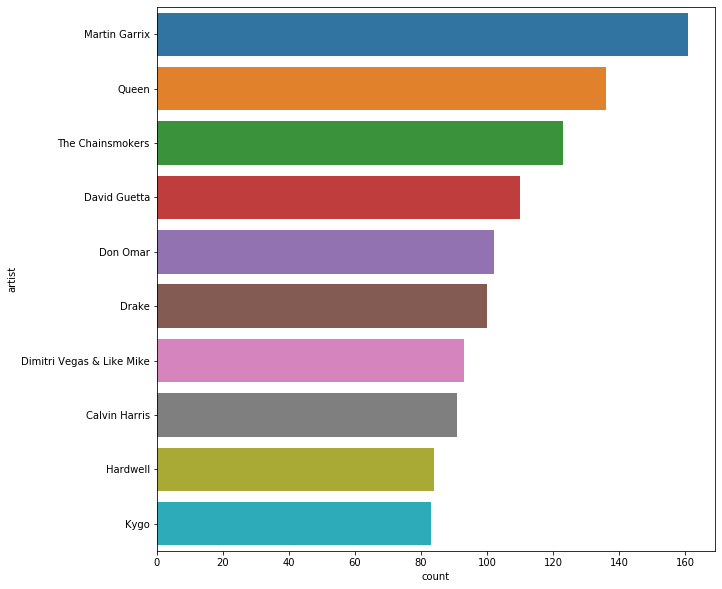

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y='artist', data=df, order=df["artist"].value_counts().nlargest(10).index)
plt.show()

# Who makes the most “Danceable” music?

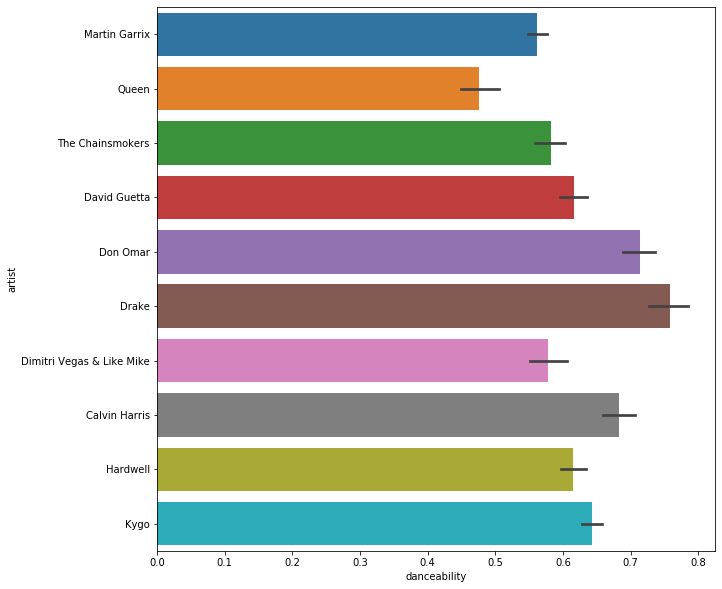

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(y='artist', x='danceability',data=df, order=df["artist"].value_counts().nlargest(10).index)
plt.show()

# What are the most popular genres?

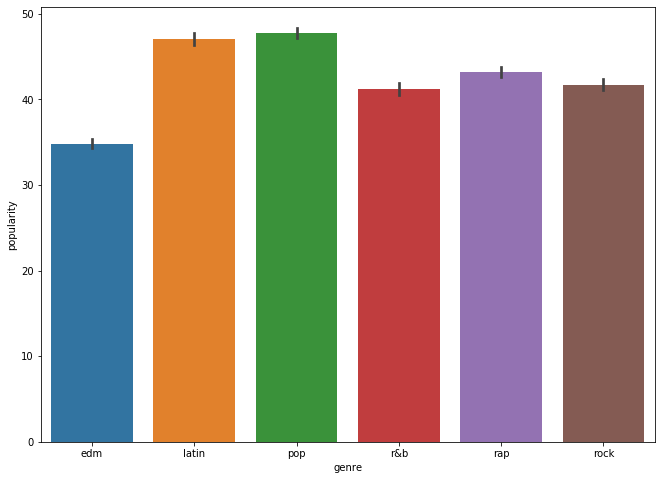

In [15]:
plt.figure(figsize=(11,8))
sns.barplot(x="genre",y="popularity",data=df)
plt.show()

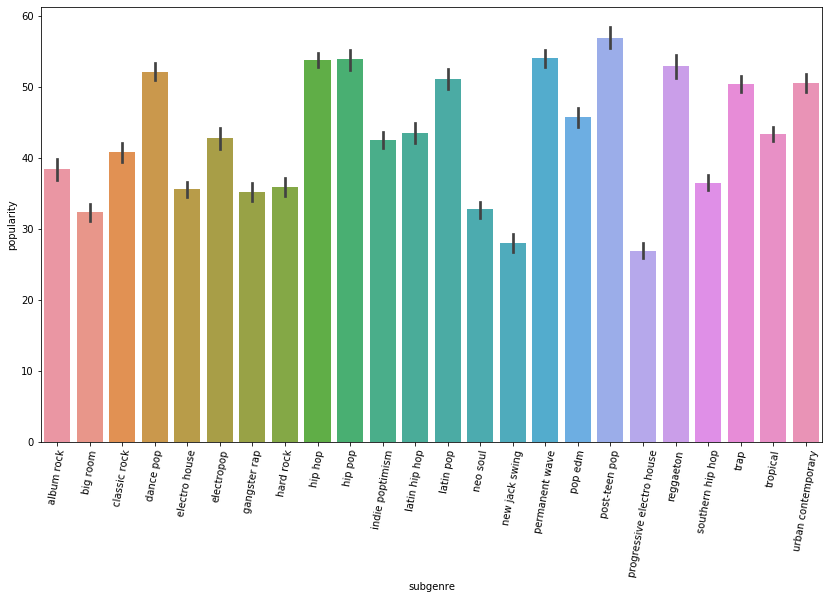

In [16]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=80)
plot=sns.barplot(x="subgenre",y="popularity",data=df)

plt.show()

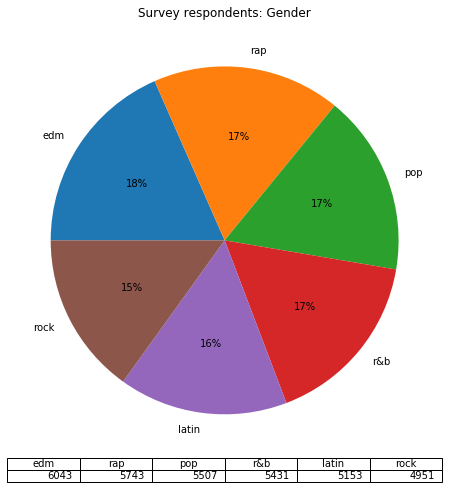

In [17]:
plt.figure(figsize=(14,8))
a = df['genre'].value_counts()
ax = a.plot.pie(autopct='%1.0f%%',startangle=180,counterclock=False,label='',title='Survey respondents: Gender',table=True)


plt.show()

# Popular songs

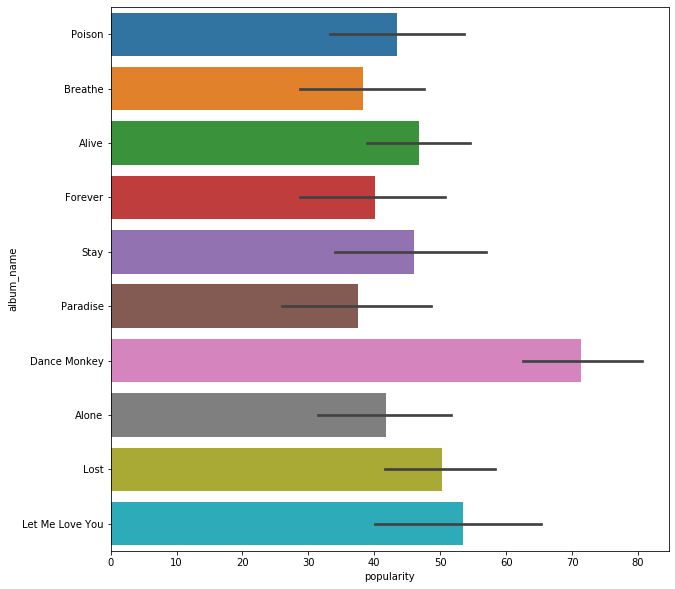

In [18]:
df.sort_values('popularity') 
plt.figure(figsize=(10,10))
sns.barplot(y='album_name', x='popularity',data=df, order=df["album_name"].value_counts().nlargest(10).index)
plt.show()

# Populart artists

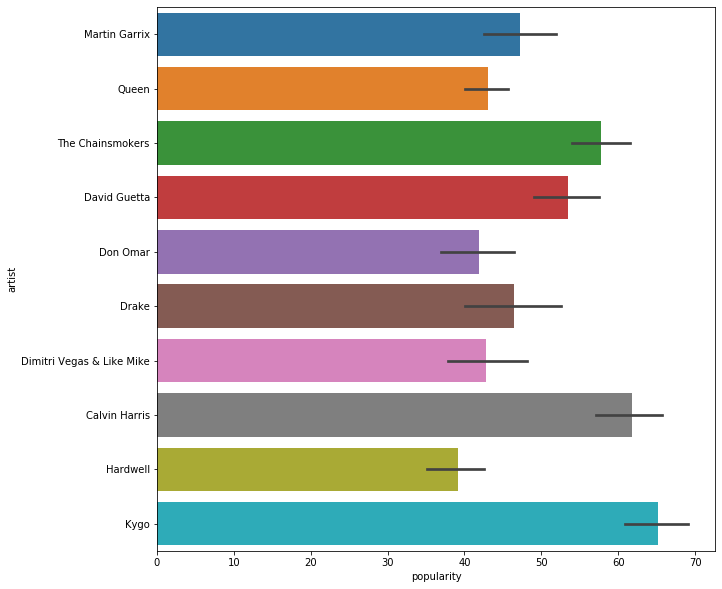

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(y='artist', x='popularity',data=df, order=df["artist"].value_counts().nlargest(10).index)
plt.show()

# Popular song released in 2019

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


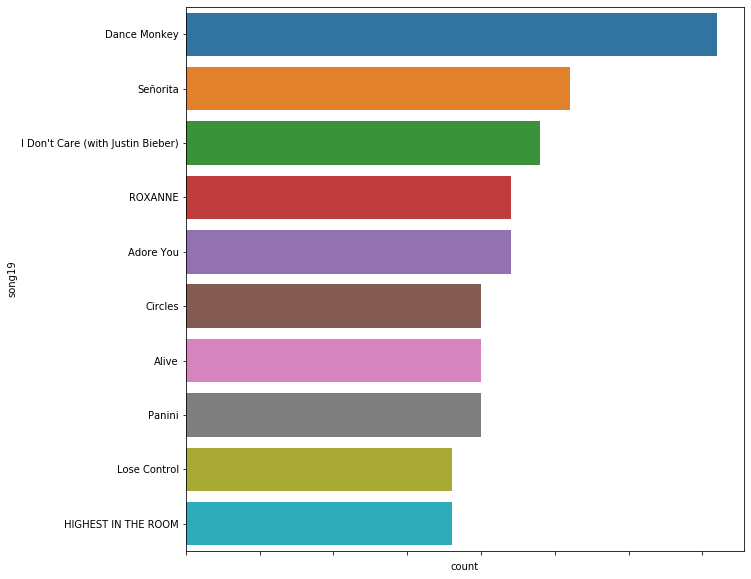

In [20]:
del df['id']

df['year']=df['year'].astype(int)
df['song19'] = df['year'] == '2019'
df['song19'] = df[(df['year']==2019)]


plt.figure(figsize=(10,10))
ax = sns.countplot(y='song19', data=df, order=df["song19"].value_counts().nlargest(10).index)
ax.set(xticklabels=[])
plt.show()

# Unpopular song released in 2019

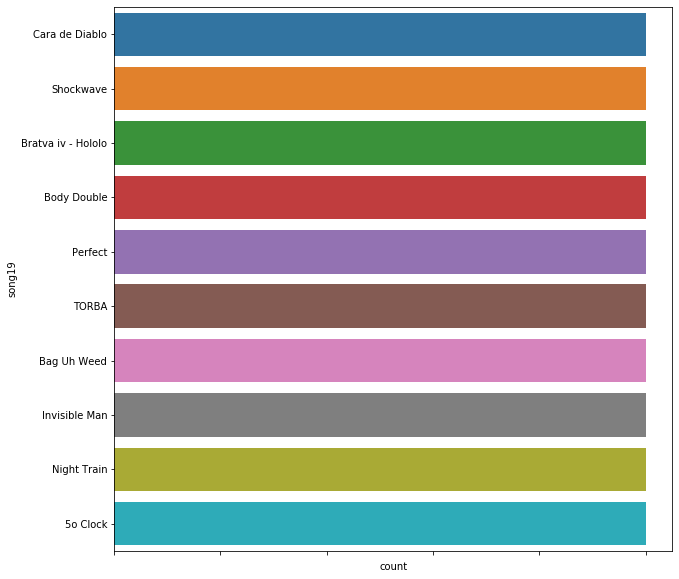

In [21]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='song19', data=df, order=df["song19"].value_counts().nsmallest(10).index)
ax.set(xticklabels=[])
plt.show()

# Popular song released in 2018

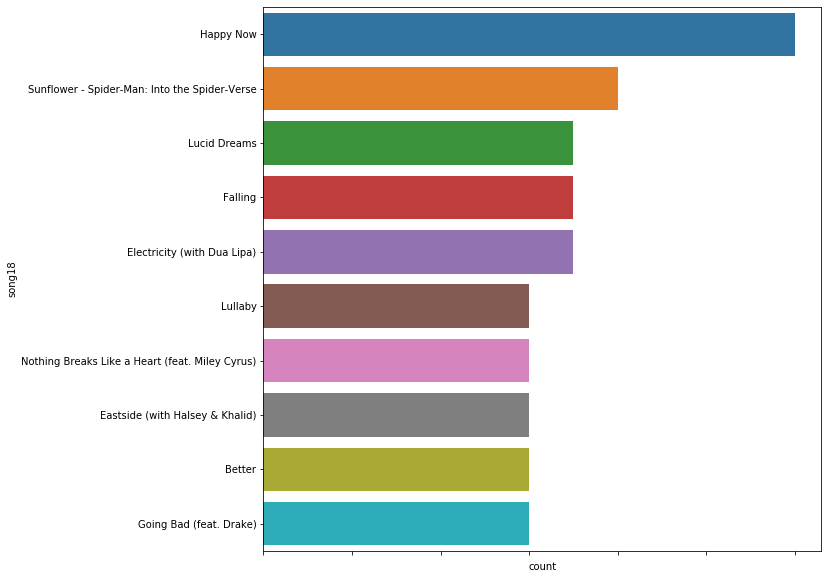

In [22]:
df['song18'] = df['year'] == '2018'
df['song18'] = df[(df['year']==2018)]

plt.figure(figsize=(10,10))
ax = sns.countplot(y='song18', data=df, order=df["song18"].value_counts().nlargest(10).index)
ax.set(xticklabels=[])
plt.show()

# Unpopular song released in 2018

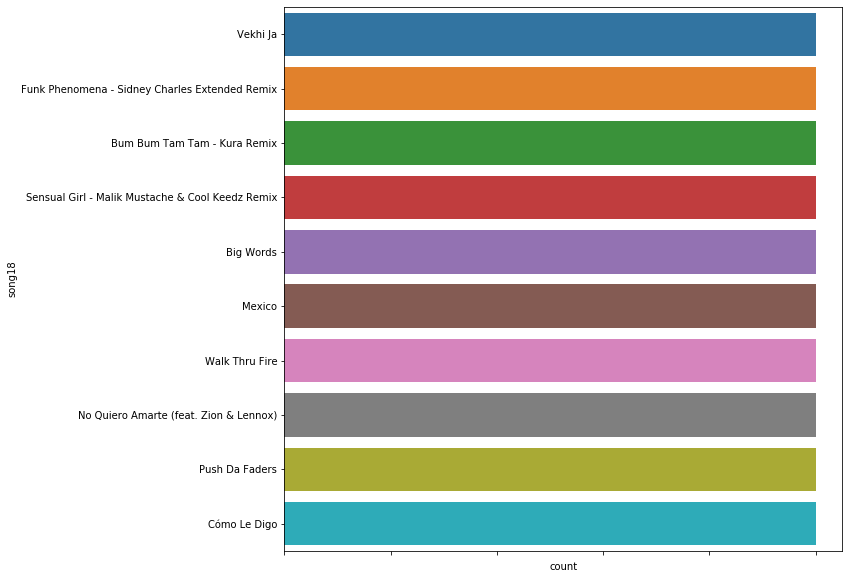

In [23]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='song18', data=df, order=df["song18"].value_counts().nsmallest(10).index)
ax.set(xticklabels=[])
plt.show()

# Popular song released in 2017

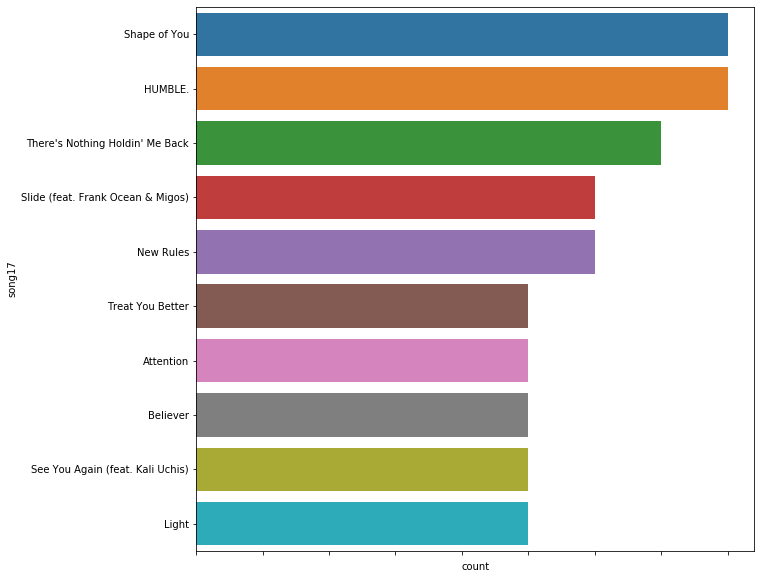

In [24]:
df['song17'] = df['year'] == '2017'
df['song17'] = df[(df['year']==2017)]

plt.figure(figsize=(10,10))
ax = sns.countplot(y='song17', data=df, order=df["song17"].value_counts().nlargest(10).index)
ax.set(xticklabels=[])
plt.show()

# Unpopular song released in 2017

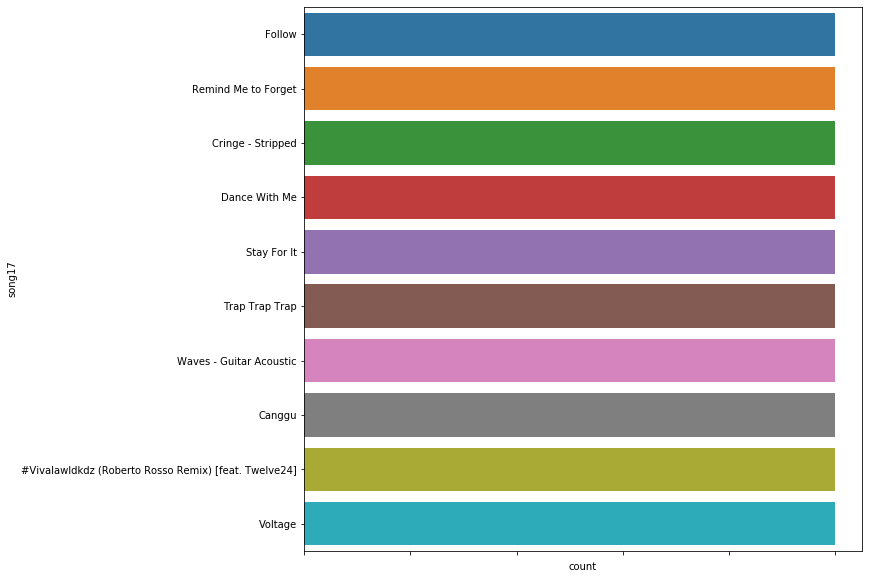

In [25]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='song17', data=df, order=df["song17"].value_counts().nsmallest(10).index)
ax.set(xticklabels=[])
plt.show()

# How well different features complement each other?

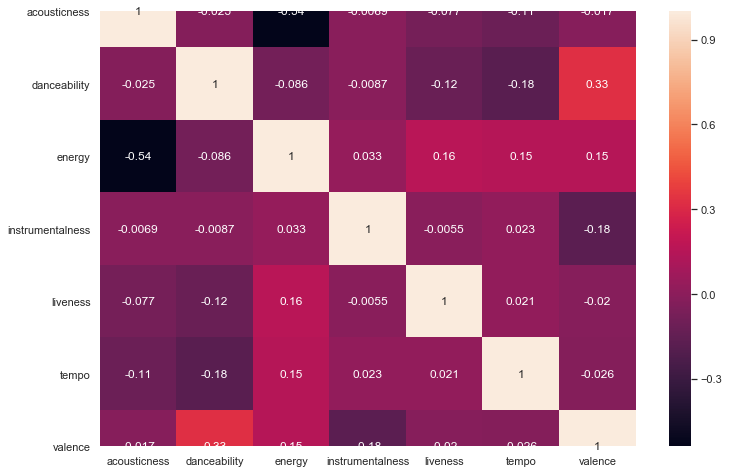

In [26]:
data = df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
sns.heatmap(data, annot=True)

# The correlation between the music features

In [27]:
year_avg = df[['danceability','energy','liveness','acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()
year_avg.head()

,year,danceability,energy,liveness,acousticness,valence
0,1957,0.51950,0.78000,0.07005,0.6025,0.9115
1,1958,0.64700,0.58200,0.07150,0.4100,0.9150
2,1960,0.38625,0.46475,0.40100,0.7215,0.5790
3,1961,0.58500,0.03600,0.09080,0.8590,0.4330
4,1962,0.81600,0.51400,0.08990,0.7670,0.9120


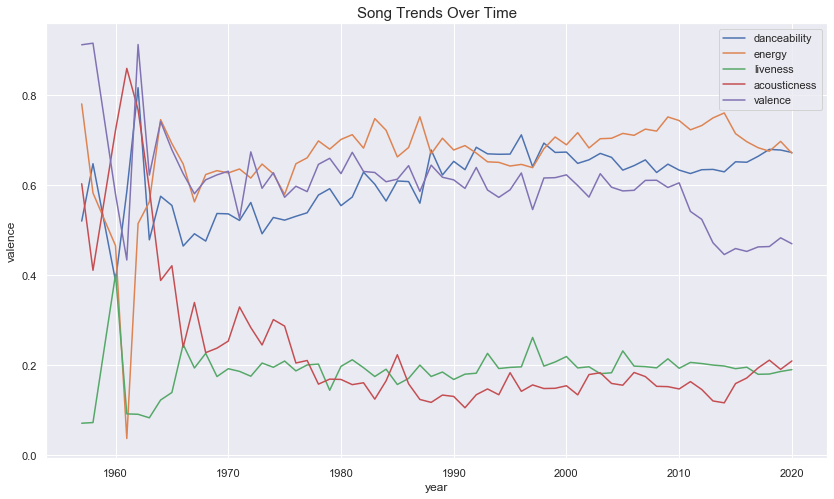

In [28]:
plt.figure(figsize=(14,8))
# plt.xticks(rotation=80)
plt.title("Song Trends Over Time", fontsize=15)
lines = ['danceability','energy','liveness','acousticness','valence']
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
plt.legend(lines)



# Artists release album

In [29]:
#shows yearly song production for these 7 artists.
artist_list = df.artist.value_counts().index[:7]

df_artists = df[df.artist.isin(artist_list)][['artist','year',
                                                        'energy']].groupby(['artist','year']).count().reset_index()
df_artists.rename(columns={'energy':'song_count'}, inplace=True)
df_artists.head(10)

,artist,year,song_count
0,David Guetta,2003,1
1,David Guetta,2004,1
2,David Guetta,2007,4
3,David Guetta,2008,1
4,David Guetta,2009,6
5,David Guetta,2010,5
6,David Guetta,2011,10
7,David Guetta,2012,17
8,David Guetta,2013,1
9,David Guetta,2014,19


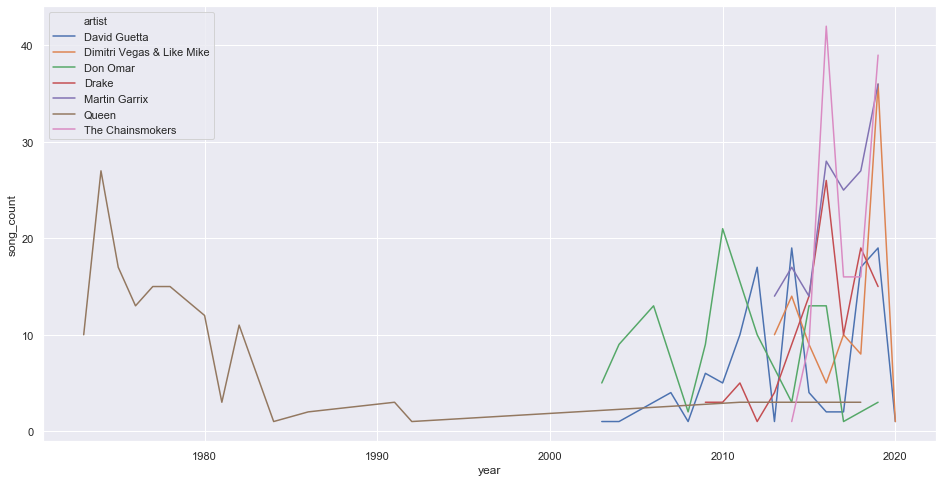

In [30]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='year', y='song_count', hue='artist', data=df_artists)